In [1]:
import sys
sys.path.append("../ml_models/")

from naive_bayes import NaiveBayes
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt

%load_ext autoreload
%autoreload 2

In [2]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24)

In [3]:
y_preds = {}
for distr in ['Gaussian', 'Uniform', 'Exponential']:
    nb = NaiveBayes(distr)
    nb.fit(X_train, y_train)
    y_pred = nb.predict(X_test)
    y_preds[distr] = y_pred
    print(distr, " Naive Bayes accuracy score: ", nb.score(X_test, y_test))

Gaussian  Naive Bayes accuracy score:  0.9473684210526315
Uniform  Naive Bayes accuracy score:  0.9473684210526315
Exponential  Naive Bayes accuracy score:  0.6052631578947368


In [4]:
print(*y_preds, 'Actual', sep='|')
preds = list(y_preds.values())
for i in range(y_test.shape[0]):
    print(preds[0][i], ' ' * 6, 
          preds[1][i], ' ' * 5,
          preds[2][i], ' ' * 9,
          y_test[i])

Gaussian|Uniform|Exponential|Actual
2        2       1           2
2        2       1           2
1        0       1           1
1        1       1           1
2        2       1           2
0        0       0           0
0        0       0           0
1        1       1           1
0        0       0           0
2        2       1           2
0        0       0           0
0        0       0           0
0        0       0           0
2        2       1           2
2        2       2           2
0        0       0           0
2        2       1           2
0        0       0           0
2        2       1           2
2        2       1           2
2        2       1           2
2        2       1           2
2        2       2           2
1        1       1           1
2        2       1           2
0        0       0           0
2        2       1           2
2        2       1           2
0        0       0           0
2        2       2           2
1        1       1           1
0  

In [5]:
X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2
)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24)

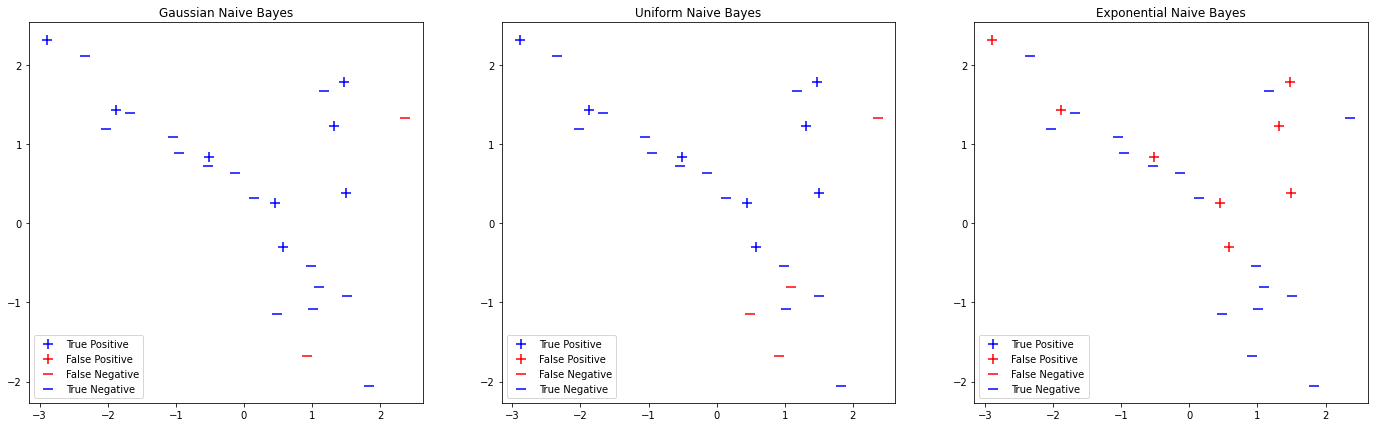

In [6]:
fig = plt.figure(figsize=(24, 7))
for i, distr in enumerate(['Gaussian', 'Uniform', 'Exponential']):
    nb = NaiveBayes(distribution=distr)
    nb.fit(X_train, y_train)
    y_pred = nb.predict(X_test)
    ax = fig.add_subplot(1, 3, i+1)
    i_p = np.where(y_test == 1)[0]
    i_n = np.where(y_test == 0)[0]
    i_tp = i_p[np.in1d(i_p, np.where(y_pred == 1))]
    i_fp = i_p[np.in1d(i_p, np.where(y_pred == 0))]
    i_fn = i_n[np.in1d(i_n, np.where(y_pred == 1))]
    i_tn = i_n[np.in1d(i_n, np.where(y_pred == 0))]
    ax.set_title((distr + ' Naive Bayes'))
    ax.scatter(X[i_tp, 0], X[i_tp, 1], marker='+', s=100, c='b', label='True Positive')
    ax.scatter(X[i_fp, 0], X[i_fp, 1], marker='+', s=100, c='r', label='False Positive')
    ax.scatter(X[i_fn, 0], X[i_fn, 1], marker='_', s=100, c='r', label='False Negative')
    ax.scatter(X[i_tn, 0], X[i_tn, 1], marker='_', s=100, c='b', label='True Negative')
    plt.legend()